In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [24]:
# Importamos un dataset de los precios de las casas en Boston
from sklearn import datasets ## imports datasets from scikit-learn
df = pd.read_csv("HousingData.csv") ## loads Boston dataset from datasets library


In [25]:
#Para ver los nombres de las columnas
print(df.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [26]:
#Vemos valores nulos o NaN y los eliminamos:
df.isna()
df=df.dropna()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [27]:
#Vemos valores nulos o NaN y los eliminamos:
#target.isna()
#target=target.dropna()
#target

In [28]:
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(df, columns=["MEDV"])


In [29]:
'''Muestra las primeras filas del dataframe df '''
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [30]:
'''Muestra las primeras filas del dataframe target '''
target.head()


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7


In [31]:
df = df.iloc[:,df.columns != "MEDV"]
X = df.to_numpy()
y = target.to_numpy()

In [32]:
y.shape, X.shape

((394, 1), (394, 13))

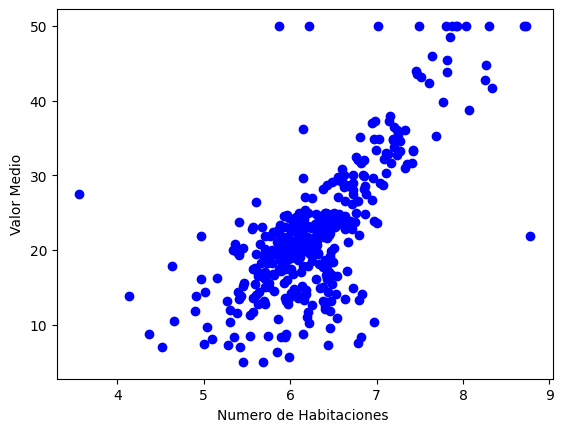

In [33]:
#Representación de una de las columnas para practicar (opcional)
XRM = df[['RM']]

plt.scatter(XRM,y,  color='blue')
plt.xlabel("Numero de Habitaciones ")
plt.ylabel("Valor Medio")
plt.show()

In [34]:
''' Crea un modelo de regresión lineal y entrénalo '''
#Separo los datos de train en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [35]:
from sklearn import linear_model
#Defino el algoritmo
modelo = linear_model.LinearRegression()

In [36]:
#Entrenamiento del modelo:
modelo.fit(X_train, y_train)

LinearRegression()

In [37]:
Y_pred = modelo.predict(X_test)
Y_pred

array([[18.68566017],
       [17.81968132],
       [29.04147367],
       [25.38858553],
       [28.7375215 ],
       [17.49834372],
       [11.33615557],
       [28.56194246],
       [21.2731138 ],
       [32.91138614],
       [18.26512435],
       [31.13975985],
       [18.339788  ],
       [32.60991723],
       [18.6456975 ],
       [22.84673608],
       [21.9415711 ],
       [24.65269856],
       [18.0759236 ],
       [24.58621214],
       [24.27035933],
       [14.29010818],
       [17.67972619],
       [43.97162876],
       [22.67161907],
       [19.063581  ],
       [27.7092047 ],
       [15.41609616],
       [16.92161325],
       [22.08494083],
       [24.39653266],
       [17.17831696],
       [12.40677679],
       [22.99331623],
       [30.88963436],
       [19.68682533],
       [20.73147387],
       [20.43455479],
       [21.8735802 ],
       [12.86551089],
       [25.58531884],
       [39.16288196],
       [14.93886498],
       [20.11587599],
       [18.56455346],
       [38

In [38]:
XRM = X_test[:,5]
XRM

array([5.851, 5.594, 6.575, 5.859, 6.727, 5.648, 5.976, 6.998, 6.484,
       7.088, 6.223, 6.951, 5.966, 7.358, 6.485, 6.474, 6.395, 6.065,
       5.404, 6.254, 6.286, 5.987, 5.741, 8.704, 6.015, 6.404, 6.635,
       5.709, 6.142, 5.572, 6.358, 5.99 , 6.459, 6.069, 6.975, 5.705,
       5.905, 6.425, 5.682, 4.963, 6.516, 7.82 , 6.208, 5.707, 6.297,
       7.454, 5.468, 8.034, 3.561, 6.122, 7.107, 5.404, 6.113, 6.38 ,
       5.807, 6.431, 6.162, 6.625, 6.251, 6.513, 6.968, 6.167, 6.604,
       6.861, 5.935, 6.417, 5.794, 6.43 , 6.487, 5.627, 6.696, 7.203,
       6.565, 6.083, 6.957, 6.163, 5.39 , 6.629, 6.431])

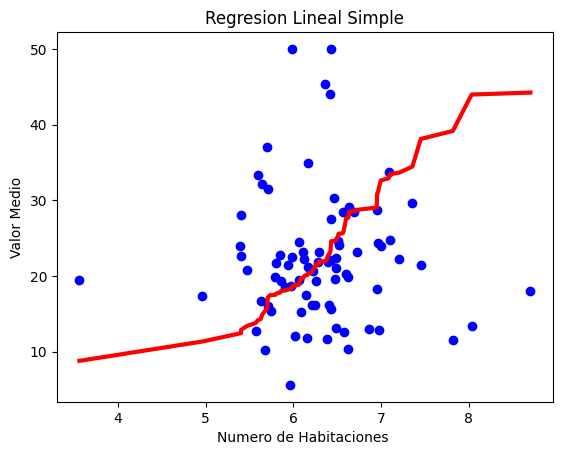

In [39]:
#Representación voluntaria regresión entre columna nº 5 (renombrada XMR = RM) y el valor medio.
XRM = np.sort(XRM, axis = 0)
Y_pred = np.sort(Y_pred, axis = 0)
plt.scatter(XRM, y_test, color = 'blue')

plt.plot(XRM, Y_pred, color = 'red', linewidth = 3)
plt.title('Regresion Lineal Simple')
plt.xlabel("Numero de Habitaciones ")
plt.ylabel("Valor Medio")
plt.show()


In [40]:
''' Predice el precio de una vivienda con los siguientes datos
0.03731	0.0	7.07	0.0	0.469	6.421	23.5	4.9671	2.0	242.0	17.8	396.90 9.14
NOTA: se corresponde con la segunda vivienda, pero con la edad de 23.5 años en lugar de 78.9'''
p = [[0.03731,	0.0,	7.07,	0.0,	0.469,	6.421,	23.5,	4.9671,	2.0,	242.0,	17.8,	396.90, 9.14]]
p_pred = modelo.predict(p)
print(p_pred)


[[25.67365862]]


In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [42]:
#Error media de los cuadrados MSE (Cuanto más bajo sea el valor mejor ajustado será el modelo) (voluntario para practicar):
sqrt(mean_squared_error(y_test, Y_pred))


11.356559476346304

In [43]:
''' Cuál es el coeficiente de determinación R2? '''
print('Coeficiente de determinación o precisión del modelo:')
print(modelo.score(X_train, y_train))


Coeficiente de determinación o precisión del modelo:
0.7653564710792783


In [44]:
''' Muestra los coeficientes y el punto de corte (intercept) '''
print('Datos del modelo de Regresion Simple \n')
print('Valor del coeficiente o pendiente:')
print(modelo.coef_)
print('Valor del punto de corte:')
print(modelo.intercept_)


Datos del modelo de Regresion Simple 

Valor del coeficiente o pendiente:
[[-4.93708758e-02  4.52638348e-02  3.51527310e-02  2.71185337e+00
  -2.04425601e+01  5.10058968e+00 -1.51652999e-02 -1.44058009e+00
   2.51322989e-01 -1.14460190e-02 -8.60877264e-01  1.27251214e-02
  -3.43746135e-01]]
Valor del punto de corte:
[25.45768001]
